# Popularity-Based Filtering

In [4]:
import numpy as np
import pandas as pd 

In [13]:
books_cleaned=pd.read_csv(r'data/processed/books_cleaned.csv')
books_list = pd.read_csv(r'data/processed/books_list.csv')

In [9]:
# compute weighted ranking scores for each book

r = books_cleaned['average_rating'] # average rating per book
v = books_cleaned['work_ratings_count'] # number of ratings per book
c = books_cleaned['average_rating'].mean() # average rating across entire dataset
m = books_cleaned['work_ratings_count'].quantile(.90) # top 10% of books with the most ratings

books_weighted_ranking = books_cleaned[['book_id','title','average_rating','work_ratings_count']].copy()
books_weighted_ranking['weighted_score'] = (r*v + c*m) / (v+m)

In [10]:
# create table that sorts books based on ranking
books_weighted_ranking = books_weighted_ranking.sort_values(by=['weighted_score'], ascending=False)

In [14]:
# function that returns most popular books

def popular_rec(num_books):
    return books_weighted_ranking[['title']][0:num_books]
popular_rec(10)

,title
24,Harry Potter and the Deathly Hallows (Harry Po...
26,Harry Potter and the Half-Blood Prince (Harry ...
17,Harry Potter and the Prisoner of Azkaban (Harr...
23,Harry Potter and the Goblet of Fire (Harry Pot...
421,"Harry Potter Boxset (Harry Potter, #1-7)"
134,"A Storm of Swords (A Song of Ice and Fire, #3)"
191,The Name of the Wind (The Kingkiller Chronicle...
20,Harry Potter and the Order of the Phoenix (Har...
1,Harry Potter and the Sorcerer's Stone (Harry P...
160,"The Return of the King (The Lord of the Rings,..."


In [15]:
popular_list = popular_rec(len(books_cleaned))
popular_list = popular_list.merge(books_list,how='inner',left_on='title',right_on='title')
popular_list.head()

,title,original_title,isbn,authors,original_publication_year,ratings_count,average_rating,image_url,small_image_url
0,Harry Potter and the Deathly Hallows (Harry Po...,Harry Potter and the Deathly Hallows,545010225,"J.K. Rowling, Mary GrandPré",2007.0,1746574,4.61,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...
1,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince,439785960,"J.K. Rowling, Mary GrandPré",2005.0,1678823,4.54,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
2,Harry Potter and the Prisoner of Azkaban (Harr...,Harry Potter and the Prisoner of Azkaban,043965548X,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,1832823,4.53,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
3,Harry Potter and the Goblet of Fire (Harry Pot...,Harry Potter and the Goblet of Fire,439139600,"J.K. Rowling, Mary GrandPré",2000.0,1753043,4.53,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...
4,"Harry Potter Boxset (Harry Potter, #1-7)",Complete Harry Potter Boxed Set,545044251,J.K. Rowling,1998.0,190050,4.74,https://images.gr-assets.com/books/1392579059m...,https://images.gr-assets.com/books/1392579059s...


In [ ]:
popular_list.to_csv('data/processed/popular_list.csv',index=False)

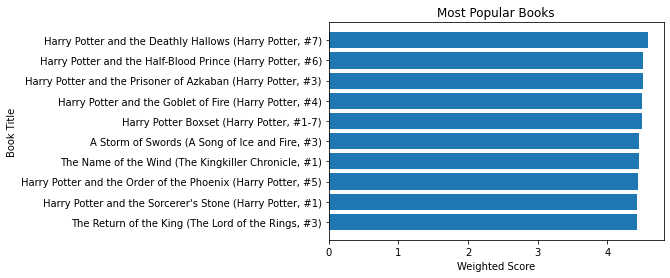

In [16]:
import matplotlib.pyplot as plt

# plots top 10 most popular books

fig, ax = plt.subplots()
most_popular_books = books_weighted_ranking[0:10]
ax.barh(most_popular_books['title'],most_popular_books['weighted_score'],align='center')
ax.set_xlabel('Weighted Score')
ax.set_ylabel('Book Title')
ax.set_title('Most Popular Books')
ax.invert_yaxis() 
plt.show()